* Title: "Tarragona_LactateAnalysis"
* author: "Giovana Gavidia"
* date: "May 10, 2019"

# Setup

In [31]:
# load main function
source(file='mainFunctionsMimics.R')

In [5]:
PatInfo <- read.csv("~/Documents/Projects/DATATHON/MIMIC/data/Tarragona/PatInfoApril2019.csv", stringsAsFactors=FALSE)
FirstDayVars <- read.csv("~/Documents/Projects/DATATHON/MIMIC/data/Tarragona/AllVarsApril2019.csv", stringsAsFactors=FALSE)
Vasopressors_FirstDay <- read.csv("~/Documents/Projects/DATATHON/MIMIC/data/Tarragona/DrugsApril2019.csv", stringsAsFactors=FALSE)

# Preprocessing
*  Replace ',' by . in the numerical variables.
* Rename VMI variable by 'Ventilation'
* Replace NAs by 0s (no ventilation) in the Ventilation variable
* In some cases, The PatInfo table included more than one observation per patient, thus, in those cases only the first observation was included in the analysis.
* APACHE values were discretized according to  deciles (APACHE_dec)

In [15]:
library(kableExtra)
# Replace ',' by .
FirstDayVars<-data.frame(FirstDayVars[,c('PatientID','VariableID','VarName')], apply(FirstDayVars[,c('FirstValue','LastValue','MaxValue','MinValue','AvgValue','StdvValue', 'MedianValue','IQR1Value','IQR3Value')],2, covertComma2Period) ) 

Vasopressors_FirstDay$Dose<-covertComma2Period(Vasopressors_FirstDay$Dose)

# Rename VMI
colnames(PatInfo)[which(colnames(PatInfo)=='VMI')]<-'Ventilation'
# Replace Nas by 0s in the Ventilation variable
PatInfo[which(is.na(PatInfo$Ventilation)),'Ventilation']<-0

# Include only the first sample per each patient

id_dup<-names(which(table(PatInfo$PatientID)>1))
PatInfo_dup<-subset(PatInfo, PatientID %in% id_dup)
head(PatInfo_dup)

# head(PatInfo_dup) %>%
#   kable() %>%
#   kable_styling()

 
 
PatInfo.first<-do.call(rbind, by(PatInfo, list(PatInfo$PatientID), FUN=function(x) head(x, 1)))

#---- classify APACHE using deciles

# quantile(PatInfo$APACHEII, prob = seq(0, 1, length = 11), type = 5)

PatInfo.first$APACHEII_dec<-cut( PatInfo.first$APACHEII, quantile(PatInfo.first$APACHEII, prob = seq(0, 1, length = 11), type = 5),labels=seq(1,10,1),include.lowest = TRUE )

,PatientID,APACHEII,Gender,AgeAtAdm,BMI_ETL,PatGroupName,AdmType,AdmWardName,DisWardName,HospDaysBeforeICU,⋯,PrincipalDiagCode,PrincipalDiagName,PrincipalDiagGroupName,APACHEAdmReasonCode,APACHEAdmReasonName,APACHEAdmReasonGroupName,SEMICYUCAdmReasonCode,SEMICYUCAdmReasonName,SEMICYUCAdmReasonGroupName,Ventilation
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
10,9185,19,M,54,"26,234567901235",MÅ dic,Urgent,UCIM-UCO Joan XXIII,MEDICINA INTERNA,"0,0013888888934162",⋯,B00.3,Meningitis per herpesvirus,Certes enfermetats infeccioses i parasitâ€¦ries,603,Altres alteracions Neurolâ€¢giques,Altres Alteracions SistÅ miques,1,01- DepressiÂ¢ del nivell de consciÅ ncia i altres trastorns neurolâ€¢gics,Motiu d'ingrâ€šs_SEMICYUC,1
11,9185,19,M,54,"26,234567901235",MÅ dic,Urgent,UCIM-UCO Joan XXIII,MEDICINA INTERNA,"0,0013888888934162",⋯,A87,Meningitis vÂ¡rica,Diagnostics (tots),603,Altres alteracions Neurolâ€¢giques,Altres Alteracions SistÅ miques,1,01- DepressiÂ¢ del nivell de consciÅ ncia i altres trastorns neurolâ€¢gics,Motiu d'ingrâ€šs_SEMICYUC,1
47,5885,11,M,61,"23,875114784206",MÅ dic,Urgent,URGÃ”NCIES,MEDICINA INTERNA,"-0,00069444444670808",⋯,038.42,SepticÅ mia per Escherichia coli [E. coli],Infeccions,206,SÅ psia,Fallida CardÂ¡aca,7,07- SÅ psia greu / Xoc sÅ ptic,Motiu d'ingrâ€šs_SEMICYUC,0
48,5885,11,M,61,"23,875114784206",MÅ dic,Urgent,URGÃ”NCIES,MEDICINA INTERNA,"-0,00069444444670808",⋯,590.10/4,Pielonefritis aguda no complicada (pnf),Genitourinari,206,SÅ psia,Fallida CardÂ¡aca,7,07- SÅ psia greu / Xoc sÅ ptic,Motiu d'ingrâ€šs_SEMICYUC,0
50,6306,40,F,59,"37,869822485207",MÅ dic,Urgent,URGÃ”NCIES,NEFROLOGIA,"0,0090277777781012",⋯,041.3/1,Klebsiella pneumonie infeccio localitzada,Infeccions,206,SÅ psia,Fallida CardÂ¡aca,7,07- SÅ psia greu / Xoc sÅ ptic,Motiu d'ingrâ€šs_SEMICYUC,1
51,6306,40,F,59,"37,869822485207",MÅ dic,Urgent,URGÃ”NCIES,NEFROLOGIA,"0,0090277777781012",⋯,599.0/5,Sepsi urinaria,Genitourinari,206,SÅ psia,Fallida CardÂ¡aca,7,07- SÅ psia greu / Xoc sÅ ptic,Motiu d'ingrâ€šs_SEMICYUC,1


## Initial Lactate vs. APACHE Analysis

* In this part, we focused only on the maximum  values computed to Lactate.
* Several participants have more that one lactate value, so only the highest maximum value recorded was considered

In [20]:
# Focus only the Max values computed to Lactate
d.lactate<-subset(FirstDayVars, VarName %in% "Lactate")

# Several participants have more that one lactate value, so only the biggest value is considered

library(reshape2)
d.lactate.max <- dcast(d.lactate[,c('PatientID','VarName','MaxValue')], PatientID ~ VarName, value.var="MaxValue",fun=max)

d.lactate.max<-merge(d.lactate.max,PatInfo.first[,c('PatientID','Gender','AgeAtAdm','APACHEII','APACHEII_dec','Ventilation')],by='PatientID',all.x = TRUE)

print("15 patients who have lactate values did not have APACHE info, so, they were excluded from the study")

library(kableExtra)
d.noAPACHE<-subset(d.lactate.max,is.na(APACHEII_dec))
rownames(d.noAPACHE)<-NULL

d.noAPACHE
# d.noAPACHE %>%
#   kable() %>%
#   kable_styling()



d.lactate.max<-subset(d.lactate.max,!is.na(APACHEII_dec))

library(psych)
res<-describeBy(group='APACHEII_dec',  x = d.lactate.max[,c('APACHEII_dec','Lactate')],mat=TRUE)
res<-res[11:20,c('group1','n','mean','sd','median','trimmed','mad','min','max','range','skew','kurtosis','se')]
rownames(res)<-NULL

colnames(res)[which(colnames(res) %in% 'group1')]<-'APACHEgroup'


res

# library(xtable)
#library(kableExtra)
# xtb<-xtable(res, caption = 'Summary of the Max Lactate values according to the APACHE categories', label = 'Tab:mRMR')
# print(xtb, type = "html")

#kable(res,caption = 'Summary of the Max Lactate values according to the APACHE categories')
# res %>%
#   kable() %>%
#   kable_styling()

Warning message in .fun(.value[0], ...):
“no non-missing arguments to max; returning -Inf”

[1] "15 patients who have lactate values did not have APACHE info, so, they were excluded from the study"


PatientID,Lactate,Gender,AgeAtAdm,APACHEII,APACHEII_dec,Ventilation
<int>,<dbl>,<chr>,<int>,<int>,<fct>,<dbl>
9041,3.69,NA,NA,NA,NA,NA
9133,3.48,NA,NA,NA,NA,NA
9186,1.68,NA,NA,NA,NA,NA
9236,3.47,NA,NA,NA,NA,NA
9245,2.32,NA,NA,NA,NA,NA
9265,3.18,NA,NA,NA,NA,NA
9276,2.54,NA,NA,NA,NA,NA
9284,1.86,NA,NA,NA,NA,NA
9295,2.96,NA,NA,NA,NA,NA


APACHEgroup,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,260,1.852846,1.330639,1.545,1.657308,0.622692,0.58,15.85,15.27,5.725863,50.518023,0.08252275
2,264,1.873333,1.036336,1.620,1.708538,0.733887,0.60,8.01,7.41,2.210853,7.126764,0.06378208
3,241,2.127593,1.490089,1.810,1.902798,0.770952,0.22,15.08,14.86,4.698668,33.365061,0.09598507
4,269,2.026654,1.292312,1.680,1.843641,0.681996,0.50,14.97,14.47,4.748229,38.530866,0.07879363
5,277,2.184946,1.492824,1.800,1.958565,0.741300,0.64,17.40,16.76,4.675521,38.804035,0.08969509
6,446,2.318991,1.822164,1.840,2.011313,0.830256,0.18,21.91,21.73,4.905377,38.536562,0.08628199
7,271,2.724428,2.465610,2.070,2.261060,0.948864,0.59,22.98,22.39,4.881693,32.635296,0.14977513
8,364,2.612582,1.943253,1.995,2.281130,1.037820,0.48,22.68,22.20,4.208440,32.518663,0.10185416
9,356,3.058764,2.470351,2.305,2.543427,1.223145,0.65,15.03,14.38,2.577716,7.490685,0.13092836


* Distribution of the Lactate values according to the APACHE categories

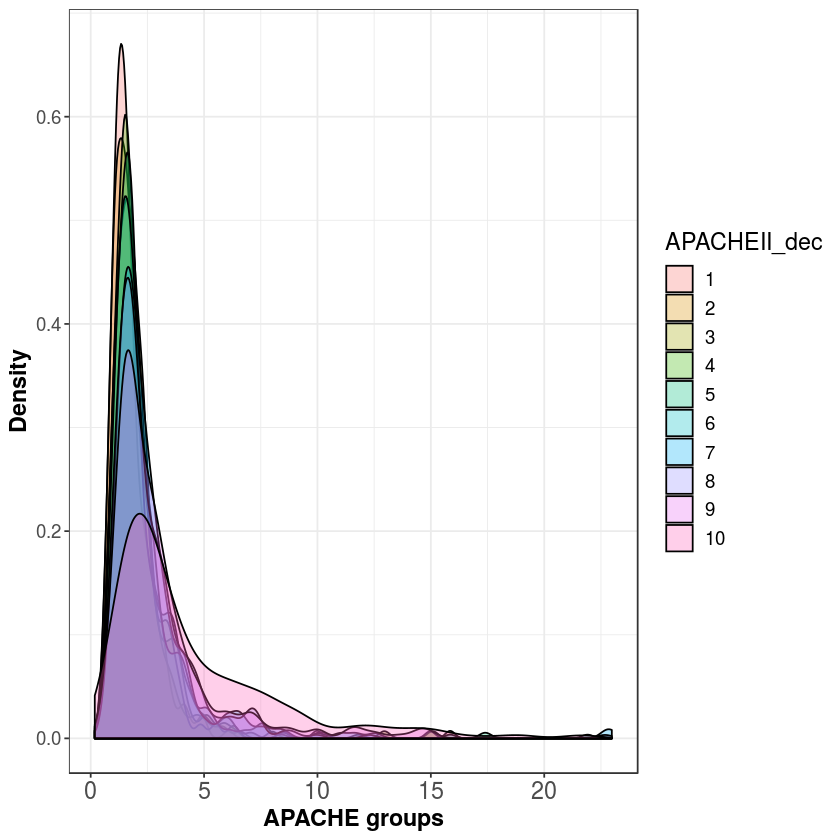

In [21]:
# Plot the distribution of lactate according to each APACHE group
library(ggplot2)
library(tidyverse)
library(hrbrthemes)

options(knitr.table.format = "html")


# file<-paste('images/distribution_APACHEgroups.png',sep='')
#   #postscript(file=file, paper="special", width=6, height=6)
#   png(file=file,width=30,height=15,units="cm",res=150)
  
print(ggplot(d.lactate.max, aes(x=Lactate, fill=APACHEII_dec)) + geom_density(alpha=.3)+
  xlab("APACHE groups") + 
    ylab("Density") +       
    theme_bw() +
    theme(plot.title = element_text(size = 14, family = "Helvetica", face = "bold"),
    text = element_text(size = 14, family = "Helvetica"),
    axis.title = element_text(face="bold"),
    axis.text.x=element_text(size = 14)))

* Figure below show that the 6th decile has the largest number of patients.

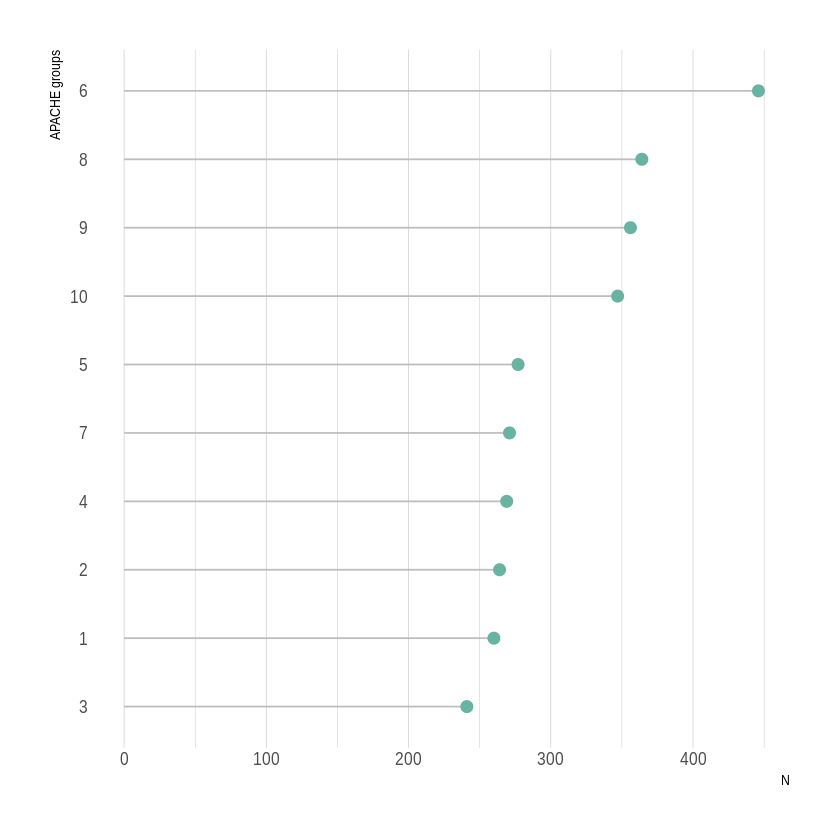

In [22]:
res %>%
  filter(!is.na(n)) %>%
  arrange(n) %>%
  mutate(APACHEgroup=factor(APACHEgroup, APACHEgroup)) %>%
  ggplot( aes(x=APACHEgroup, y=n) ) +
    geom_segment( aes(x=APACHEgroup ,xend=APACHEgroup, y=0, yend=n), color="grey") +
    geom_point(size=3, color="#69b3a2") +
    coord_flip() +
    theme_ipsum() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position="none"
    ) +
    xlab("APACHE groups") + 
    ylab("N")

## Exploratory Data Analysis of the lactate types according to the vasopressors and Ventilation therapies

We want to visualize the total dose of vasopressor on the first day in the ICU for each drug listed here:

Note:
* Dopamine
* Adrenaline (in MIMICS, it is equivalent to Epinephrine)
* Noradrenaline (in MIMICS, it is equivalent to Norepinephrine)
* In Tarragona, they do not use Phenylephrine and  Vasopressin

The complete Vasopressors_FirstDay database only includes observations from 1208 patients but the Lactate table includes samples from 3095 patients. Thus, the vasopressors table was filtered keeping only samples from the patients with Lactate values.

Figure below shows the missingness pattern in data according to some sociodemographic variables, ventilation and vasopressors. Percentages represent the amount of missing observation for each variable. Missing samples are highlighted in black. In addition, the graph also provides information on the overall percentage of missing values overall (in the legend). 


* Lactate values were discretized as normal (Lactate < 2) and non-normal (Lactate >=2)
* The number of vasopressors therapies as well as the total doses by each patient were computed

By comparing the usage of vasopressors, we found that dopamine is used less than both Dobutamine and Noradrenaline, and Noradrenaline (equivalent to Norepinephrine) is the most used therapy.

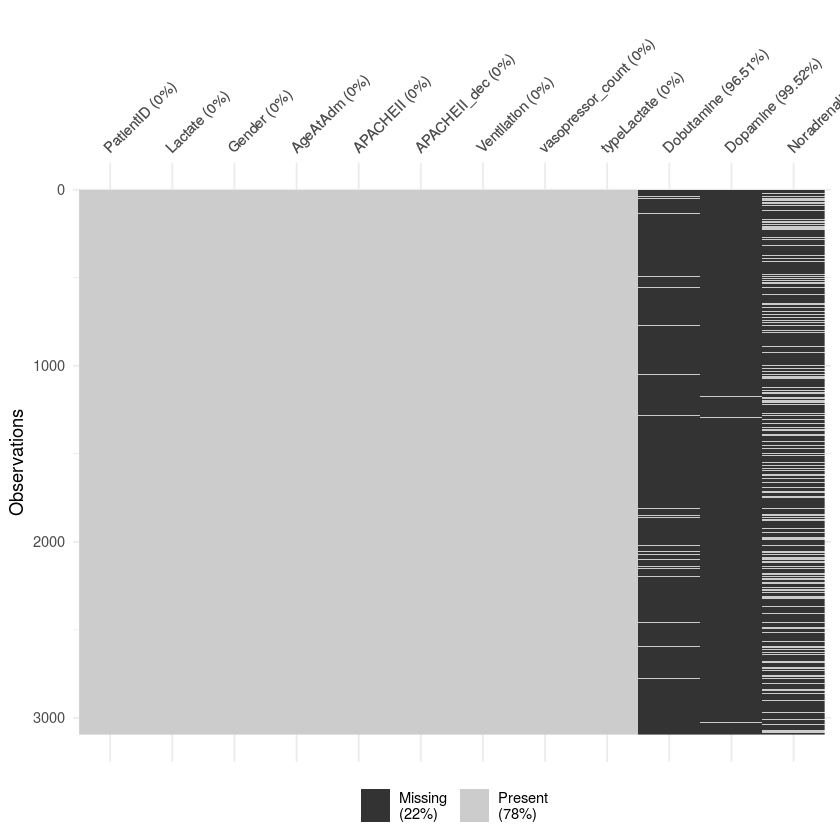

In [25]:
# DrugsApril2019 <- Tienes las drogas vasoactivas que se dieron el primer dia de estancia y sus dosis. Dopamine igual que el MIT, Epinephrine y Norepinephrine son Adrenaline y Noradrenaline en nuestro caso, son las mismas drogas con diferente nombre, y finalmente Phenylephrine y vasopressin no usamos... Te las doy por separado para que puedas hacer analisis por separado, pero si quieres hacer analisis de dosis de drogas vasoactivas total tendrás que sumar las dosis de todas las que haya llevado un mismo paciente, y para tener el numero pues contar cuantas diferentes han recibido.

# reshape long 2 wide

library(reshape2)

dw.Vasopressors <- dcast(Vasopressors_FirstDay, PatientID ~ Drug, value.var="Dose")

d.lactate.max<-merge(d.lactate.max,dw.Vasopressors , by='PatientID',all.x = TRUE)


library(naniar)

print(vis_miss(d.lactate.max ))

* Following graph shows the patterns in data from people who used vasopressors according to the APACHE groups and Lactate groups. In both lactate groups, most of the patients were treated with Noradrenaline. In the non-normal lactate group, most of the patients belong to the APACHE Group 10. Also,we found that Dopamine is the therapy less used within both lactate groups.

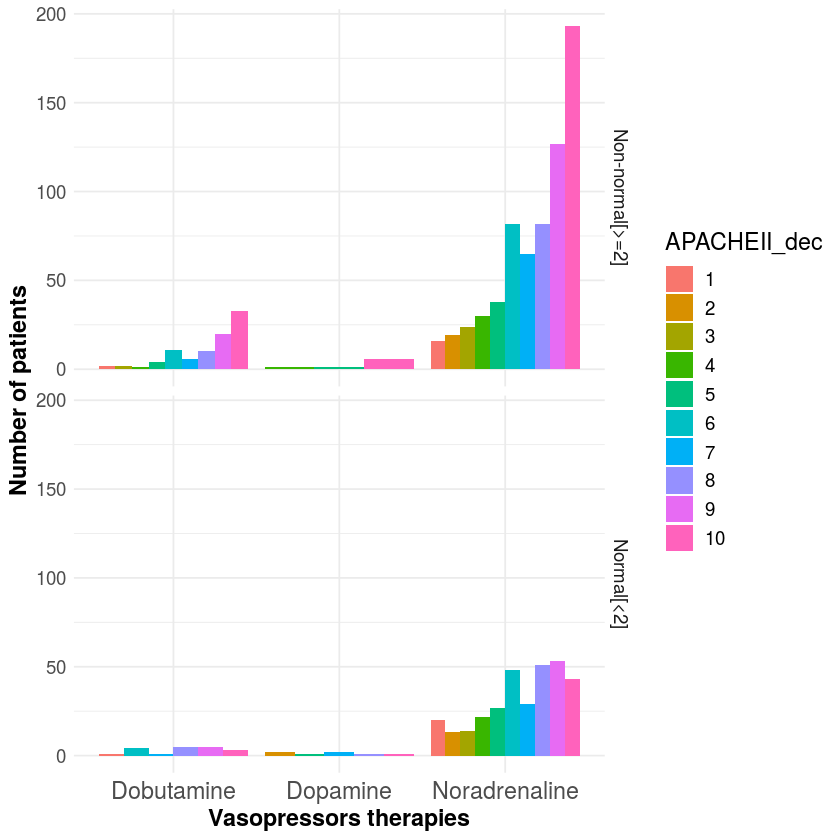

In [26]:
library(ggplot2)

d.lactate.max$typeLactate<-NA
d.lactate.max[which(d.lactate.max$Lactate<2),'typeLactate']<-'Normal[<2]'
d.lactate.max[which(d.lactate.max$Lactate>=2),'typeLactate']<-'Non-normal[>=2]'


d.vaso.ocu<-d.lactate.max[,c('PatientID','APACHEII_dec','Gender','typeLactate','Ventilation','Dobutamine','Dopamine','Noradrenaline')]


library(reshape2)

# Specify id.vars: the variables to keep but not split apart on
d.vaso.ocu<-melt(d.vaso.ocu, id.vars=c( "PatientID","APACHEII_dec","Ventilation","Gender","typeLactate"))

d.vaso.ocu<-subset(d.vaso.ocu,!is.na(value))

# plotStatisticsWhole(d=dw.Vasopressors,plot_title='',source='Patient',sizeFont=3.5,groupname='APACHEII_dec')

g <- ggplot(d.vaso.ocu, aes(variable))+
   geom_bar(aes(fill = APACHEII_dec), position = position_dodge()) +
  theme_minimal() + xlab('Vasopressors therapies')+ylab('Number of patients')+
    theme(plot.title = element_text(size = 14, family = "Helvetica", face = "bold"),
    text = element_text(size = 14, family = "Helvetica"),
    axis.title = element_text(face="bold"),
    axis.text.x=element_text(size = 14))+
  facet_grid(typeLactate ~.)
 #theme(legend.position = "top")

print(g)

Following graph shows the vasopressor counts according to the lactate type (normal and non-normal values). As in the MIMICs database, Figure shows that most of the patients who received at least one vasopressor therapy had non-normal lactate. Also, the graph also shows that most of the patients in the Tarragona database did not received any vasoppressor therapy.

                 typeLactate
vasopressor_count Non-normal[>=2] Normal[<2]
                0             760       1324
                1             593        310
                2              90         18

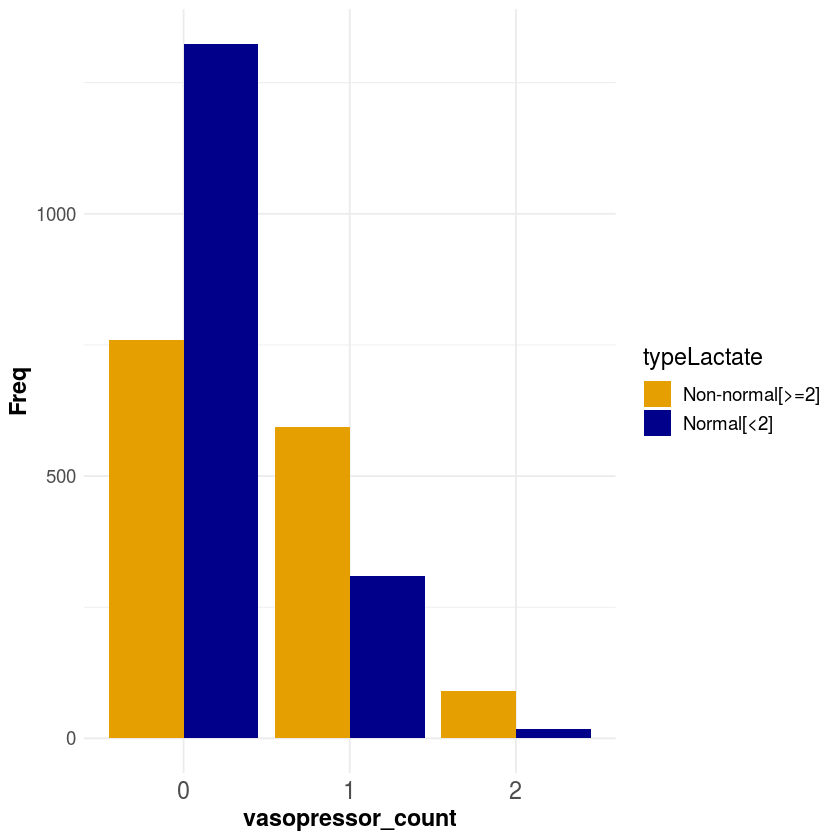

In [27]:
d.vaso.ocu$APACHEII_dec<-as.character(d.vaso.ocu$APACHEII_dec)

vaso.count<-aggregate(variable~ PatientID , data = d.vaso.ocu,FUN = "length")
# vaso.dose<-aggregate(Dose~ PatientID , data = d.vaso.ocu,FUN = "sum")

# vaso.count<-merge(vaso.count, vaso.dose, by='PatientID')

# merge vasopressors with lactate data
d.lactate.max<-merge(d.lactate.max,vaso.count, by='PatientID',all.x = TRUE)
colnames(d.lactate.max)[which(colnames(d.lactate.max)=='variable')]<-'vasopressor_count'
d.lactate.max[which(is.na(d.lactate.max$vasopressor_count)),'vasopressor_count']<-0


# plot the vasopressor count


tbl <- with(d.lactate.max, table(vasopressor_count, typeLactate,exclude = NULL))

tbl
# tbl %>%
#   kable() %>%
#   kable_styling()



library(ggplot2)

p.vasocount <- ggplot(as.data.frame(tbl), aes(vasopressor_count, Freq, fill = typeLactate)) +     
  geom_col(position = 'dodge')+
  theme_minimal() +
  scale_fill_manual(values=c('Non-normal[>=2]'='#E69F00','Normal[<2]'='darkblue'))+
    theme(plot.title = element_text(size = 14, family = "Helvetica", face = "bold"),
    text = element_text(size = 14, family = "Helvetica"),
    axis.title = element_text(face="bold"),
    axis.text.x=element_text(size = 14))
 #theme(legend.position = "top")

print(p.vasocount)

Following tables and graph represent the relationship between Lactate type and Ventilation therapy. Most of those who received Ventilation had non-normal lactate values.

                 Ventilation
typeLactate          0    1
  Non-normal[>=2]  578  865
  Normal[<2]      1074  578

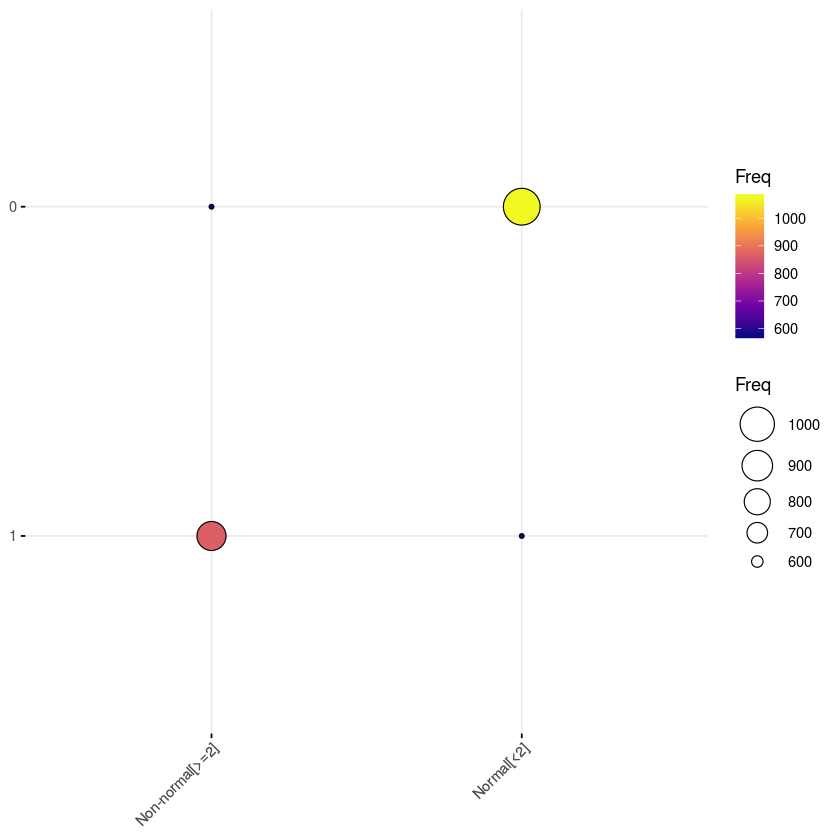

In [28]:
library(ggplot2)

t_lact_Ventilation<-with(d.lactate.max, table(typeLactate, Ventilation , exclude= NULL))
t_lact_Ventilation

# t_lact_Ventilation %>%
#   kable() %>%
#   kable_styling()
  
library(ggpubr)
p.lact_Ventilation<-ggballoonplot(as.data.frame(t_lact_Ventilation), fill='value') +     
  scale_fill_viridis_c(option='C')
  
  
print(p.lact_Ventilation)